In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd

In [2]:
#Import data
data = pd.read_csv("data/background_220720.txt",dtype=np.float64)
bknd_bins = data.iloc[:,0]
bknd_cnts = data.iloc[:,1]
bknd_bins = np.asarray(bknd_bins,dtype=np.double)
bknd_cnts = np.asarray(bknd_cnts)

databoron = pd.read_csv("data/boron_220721.txt",dtype=np.float64)
boron_bins = databoron.iloc[:,0]
boron_cnts = databoron.iloc[:,1]
boron_bins = np.asarray(boron_bins,dtype=np.double)
boron_cnts = np.asarray(boron_cnts)

datatimed = pd.read_csv("data/timed_background_220722.txt",dtype=np.float64)
tbknd_bins = datatimed.iloc[:,0]
tbknd_cnts = datatimed.iloc[:,1]
tbknd_bins = np.asarray(tbknd_bins,dtype=np.double)
tbknd_cnts = np.asarray(tbknd_cnts)

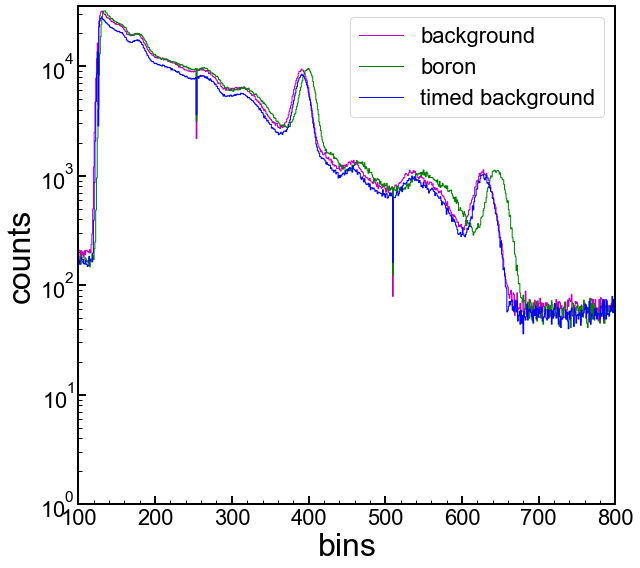

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(bknd_bins,bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
ax1.step(boron_bins,boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
ax1.step(tbknd_bins,tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

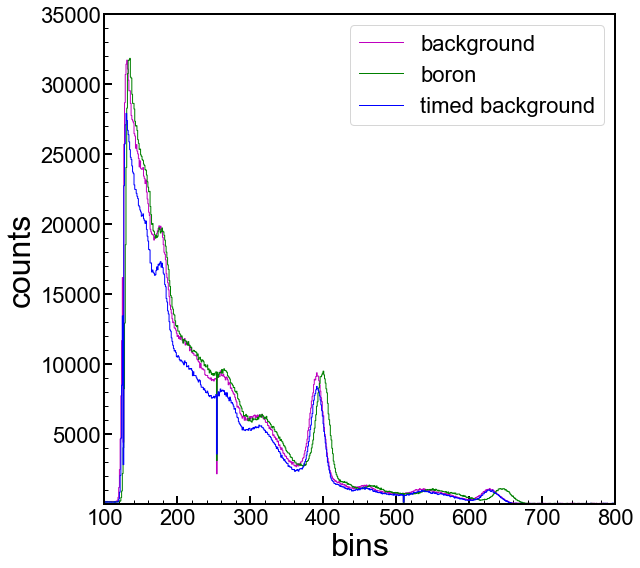

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(bknd_bins,bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
ax1.step(boron_bins,boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
ax1.step(tbknd_bins,tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [5]:
import lmfit as lf
from scipy.interpolate import InterpolatedUnivariateSpline as interp

def gaussian(x,a,m,s):
    return a*np.exp(-(x-m)**2/(2*s**2))

gauss_mod = lf.Model(gaussian)
gauss_params = gauss_mod.make_params()
gauss_params.add('s',value=1,min=0)

fine = np.arange(min(bknd_bins),max(bknd_bins))

In [6]:

interpolated = interp(bknd_bins,bknd_cnts,k=5)
interpolatey = interpolated(fine)
#print(interpolatey[abs(fine - a) < 10])
#print(fine[abs(fine - a) < 10])

In [7]:
a=390
arange=15
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_bk = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_bk.best_values)

b=625
brange=20
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_bk = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_bk.best_values)

{'a': 9121.944208105111, 'm': 390.61258202552705, 's': 10.756712551597461}
{'a': 1048.2790453099217, 'm': 627.2325009453233, 's': 13.824277833641522}


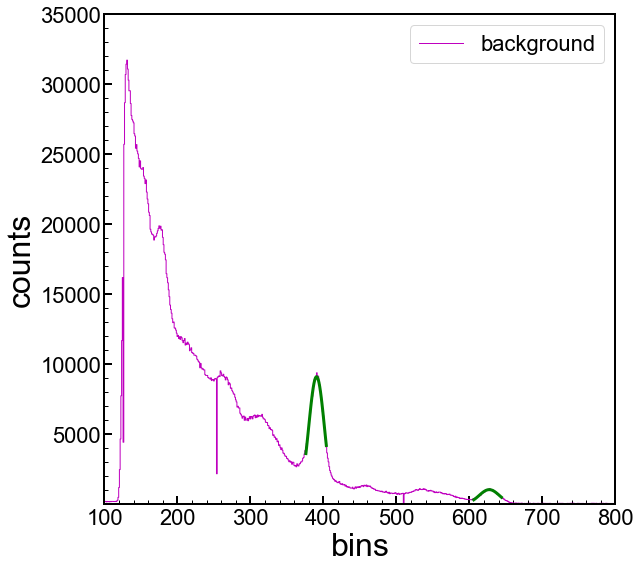

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(bknd_bins,bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_bk.best_fit,color='green',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_bk.best_fit,color='green',linewidth=3)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [9]:
interpolated = interp(boron_bins,boron_cnts,k=5)
interpolatey = interpolated(fine)

In [10]:
a=398
arange=15
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_b = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_b.best_values)

b=645
brange=20
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_b = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_b.best_values)

{'a': 9309.082758228473, 'm': 398.59738483164386, 's': 10.440320227984742}
{'a': 1119.836911563749, 'm': 644.8342723313344, 's': 12.636293385706374}


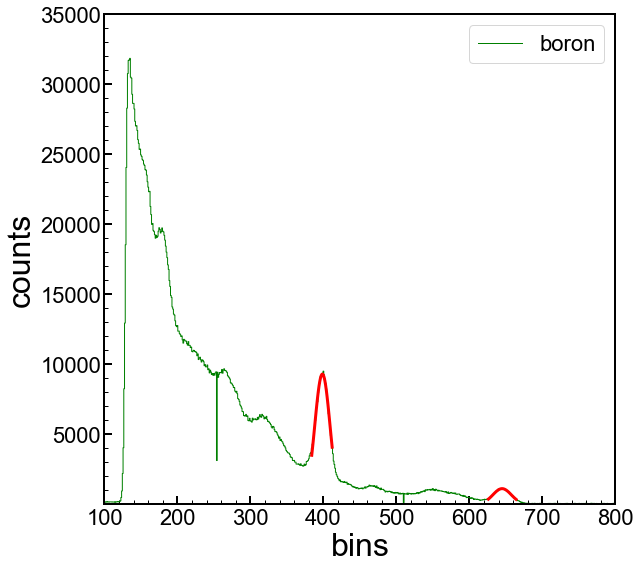

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(boron_bins,boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_b.best_fit,color='red',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_b.best_fit,color='red',linewidth=3)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [12]:
interpolated = interp(tbknd_bins,tbknd_cnts,k=5)
interpolatey = interpolated(fine)

In [13]:
a=390
arange=15
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_tbk = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_tbk.best_values)

b=625
brange=20
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_tbk = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_tbk.best_values)

{'a': 8169.932451463899, 'm': 391.3819272237996, 's': 10.507093673662455}
{'a': 973.968277285985, 'm': 628.256113560953, 's': 12.80794806618402}


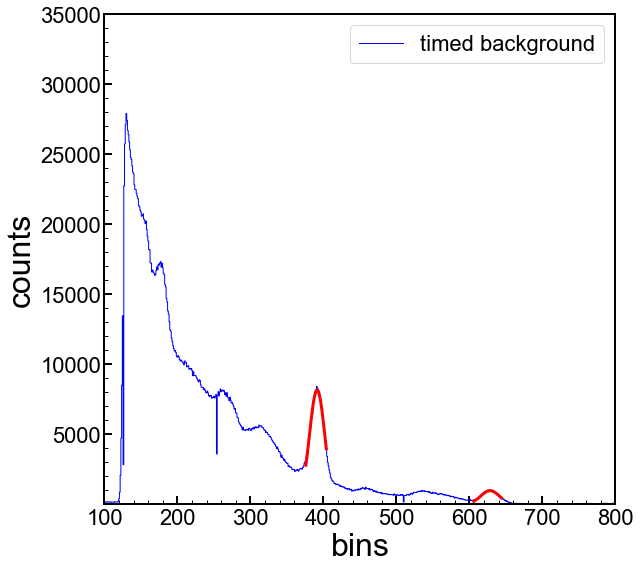

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(tbknd_bins,tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_tbk.best_fit,color='red',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_tbk.best_fit,color='red',linewidth=3)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [32]:
#calibration 40K-1.4608 MeV; 208Tl-2.6145 MeV
mbk = (2614.5-1460.8)/(fitb_bk.best_values['m']-fita_bk.best_values['m'])
bbk = 1460.8 - mbk*fita_bk.best_values['m'] 

mb = (2614.5-1460.8)/(fitb_b.best_values['m']-fita_b.best_values['m'])
bb = 1460.8 - mb*fita_b.best_values['m'] 

mtbk = (2614.5-1460.8)/(fitb_tbk.best_values['m']-fita_tbk.best_values['m'])
btbk = 1460.8 - mtbk*fita_tbk.best_values['m'] 

calbk = lambda b: mbk*b+bbk
calb = lambda b: mb*b+bb
caltbk = lambda b: mtbk*b+btbk

print(fita_bk.best_values['m'])
print(mbk)
print(bbk)
print(calbk(bknd_bins))
print(bknd_bins)

390.61258202552705
4.875751818641497
-443.7300071952145
[-438.85425538 -433.97850356 -429.10275174 ... 4534.41259964 4539.28835146
 4544.16410328]
[1.000e+00 2.000e+00 3.000e+00 ... 1.021e+03 1.022e+03 1.023e+03]


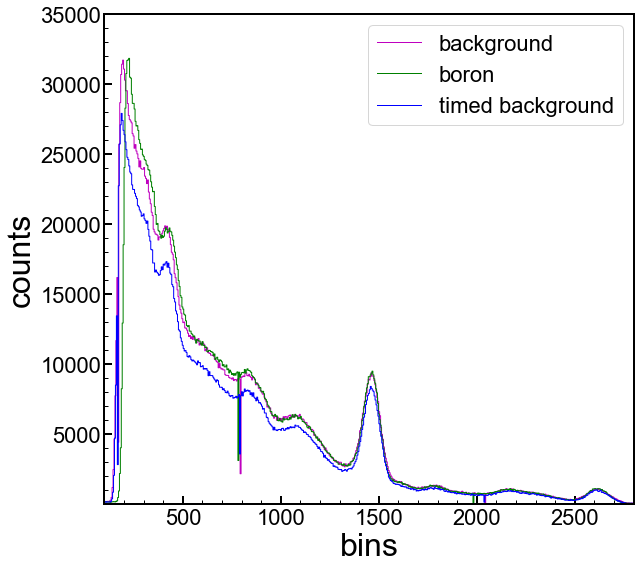

In [33]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=2800.0
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(calbk(bknd_bins),bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
ax1.step(calb(boron_bins),boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
ax1.step(caltbk(tbknd_bins),tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()